Aprendizado Não Supervisionado - CLUSTERING / AGRUPAMENTO

O K-Means é um algoritmo de aprendizado de máquina não supervisionado que agrupa dados em um número k de clusters. O número de clusters é definido pelo usuário e o algoritmo tentará agrupar os dados mesmo que esse número não seja o ideal para o caso específico. Portanto, temos que criar uma técnica que nos ajude a decidir quantos clusters devemos usar para o modelo K-Means.

Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://www.youtube.com/watch?v=FqIGui0rwh4 (How to Choose the Number of Clusters)

https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

https://www.kaggle.com/code/eriveltonguedes/7-clusteriza-o-k-means-erivelton


In [1]:
# Importando os pacotes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importando o algoritmo K-Means:
from sklearn.cluster import KMeans

# Métrica de avaliação para modelos de clustering:
from sklearn.metrics import silhouette_score

# Vamos utilizar o dataset Iris dentro do pacote datasets do sklearn:
from sklearn import datasets

# O pacote warnings inibe a visualização de avisos nos outputs do Colab.
import warnings
warnings.filterwarnings('ignore')

Para exemplificar, utilizaremos o "lendário" dataset "IRIS".

https://en.wikipedia.org/wiki/Iris_flower_data_set

https://www.kaggle.com/datasets/arshid/iris-flower-dataset


O conjunto de dados da flor Iris é um conjunto de dados multivariados introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936.

 Também chamado de conjunto de dados "Iris de Anderson" pois Edgar Anderson coletou os dados para quantificar a variação morfológica das flores Iris de três espécies relacionadas.

 O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris (Iris Setosa, Iris Virginica e Iris Versicolor).

 Foram medidas quatro características de cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros.

 Exemplo de Classificação usando o Iris Dataset, no canal Programação Dinâmica:
 https://www.youtube.com/watch?v=DeAuVrhKw58


In [2]:
# Importando a base de dados
# Criamos a variável dados para receber o conjunto de dados
dados = pd.read_csv("/content/household_power_consumption.csv")

In [3]:
# Convertendo a variável dados em um dicionário Python
# dados = dict(dados)

In [3]:
dados

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
1861031,1/7/2010,02:35:00,0.366,0.180,238.840,1.600,0.000,0.000,1.0
1861032,1/7/2010,02:36:00,0.290,0.072,239.090,1.200,0.000,0.000,1.0
1861033,1/7/2010,02:37:00,0.276,0.052,239.210,1.200,0.000,0.000,0.0
1861034,1/7/2010,02:38:00,0.532,0.126,238.850,2.800,0.000,0.000,4.0


In [4]:
type(dados)

pandas.core.frame.DataFrame

In [5]:
# Visualizando as features:
dados['Global_active_power']

0          4.216
1          5.360
2          5.374
3          5.388
4          3.666
           ...  
1861031    0.366
1861032    0.290
1861033    0.276
1861034    0.532
1861035      NaN
Name: Global_active_power, Length: 1861036, dtype: object

In [7]:
# Visualizando o target:
dados['Sub_metering_2']

0          1.000
1          1.000
2          2.000
3          1.000
4          1.000
           ...  
1861031    0.000
1861032    0.000
1861033    0.000
1861034    0.000
1861035      NaN
Name: Sub_metering_2, Length: 1861036, dtype: object

In [6]:
# Criamos o dataframe df apenas com as colunas referentes às features:
df = dados[['Global_active_power', 'Sub_metering_2']]
df

,Global_active_power,Sub_metering_2
0,4.216,1.000
1,5.360,1.000
2,5.374,2.000
3,5.388,1.000
4,3.666,1.000
...,...,...
1861031,0.366,0.000
1861032,0.290,0.000
1861033,0.276,0.000
1861034,0.532,0.000


**Método Elbow**

O método Elbow é uma técnica muito popular e a ideia é executar o agrupamento k-means para um intervalo de clusters k (digamos de 1 a 10) e para cada valor, estamos calculando a soma das distâncias ao quadrado de cada ponto até seu centro atribuído (distorções).

In [7]:
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.mean(), inplace=True)
df

,Global_active_power,Sub_metering_2
0,4.216000,1.000000
1,5.360000,1.000000
2,5.374000,2.000000
3,5.388000,1.000000
4,3.666000,1.000000
...,...,...
1861031,0.366000,0.000000
1861032,0.290000,0.000000
1861033,0.276000,0.000000
1861034,0.532000,0.000000


In [8]:
distorcoes = []
K = range(1,10)
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df)
    distorcoes.append(modelo01.inertia_)

# Observação:
# O método "inertia_" permite calcular as distorções, ou seja,
# Soma das distâncias ao quadrado das amostras até o centro do cluster (centroides) mais próximo,
# ponderadas pelos pesos das amostras, se fornecidas

In [9]:
distorcoes

[67793960.01809877,
 10825857.206340814,
 5725314.601974803,
 3588322.6843399797,
 2505505.702866856,
 1937582.5210647215,
 1555683.9248610747,
 1216252.1877605205,
 1026875.084720342]

Observando a Curva de Elbow

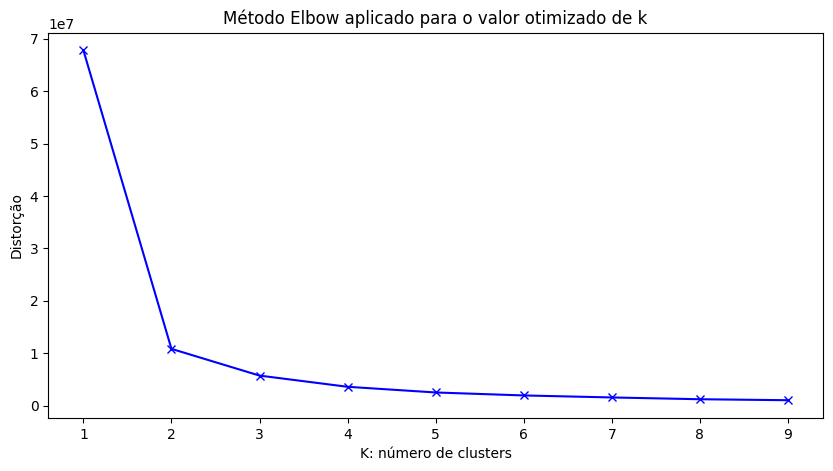

In [10]:
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

# Define os labels do eixos do gráfico:
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Define um título para o gráfico:
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostra o gráfico:
plt.show()

In [11]:
modelo_KMeans = KMeans(n_clusters=2)
modelo_KMeans.fit(df)

KMeans(n_clusters=2)

In [12]:
# A partir do modelo treinado, fazemos as predições dos clusters e criamos uma coluna chamada "k_means"
df['clusters'] =modelo_KMeans.predict(df)

In [13]:
df['clusters'].unique()

array([0, 1], dtype=int32)

In [24]:
# Adicionando a coluna "target" com os dados originais do dataset, para podermos comparar...
df['target'] = dados['Sub_metering_2']

In [25]:
df.head()

,Global_active_power,Sub_metering_2,clusters,target
0,4.216,1.0,0,1.000
1,5.360,1.0,0,1.000
2,5.374,2.0,0,2.000
3,5.388,1.0,0,1.000
4,3.666,1.0,0,1.000


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0          1.000
1          1.000
2          2.000
3          1.000
4          1.000
           ...  
1861031    0.000
1861032    0.000
1861033    0.000
1861034    0.000
1861035      NaN
Name: target, Length: 1861036, dtype: object

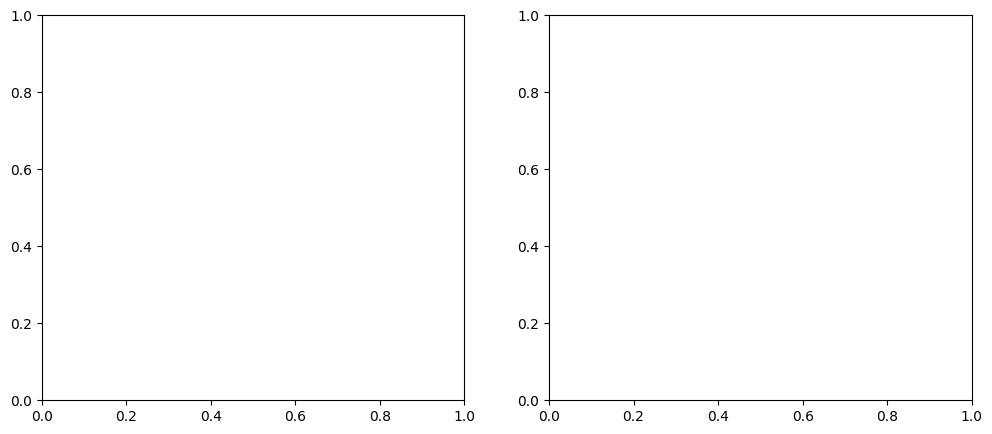

In [26]:
# Comparando graficamente os dados originais e a coluna de clusters criada pelo algoritmo K-Means
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(df['Global_active_power'], df['Sub_metering_2'], c=df['target'], cmap=plt.cm.Set1)
axes[1].scatter(df['Global_active_power'], df['Sub_metering_2'], c=df['clusters'], cmap=plt.cm.Set2)
axes[0].set_title('Coluna "target" original', fontsize=13)
axes[1].set_title('Clusters criados pelo algoritmo K_Means', fontsize=13)

Avaliação do modelo de Clustering

Silhouette Score é uma ferramenta para avaliar a adequação dos resultados de agrupamento, fornecendo uma medida quantitativa de quão bem definidos e distintos são os agrupamentos.

Fontes de pesquisa:

https://www.educative.io/answers/what-is-silhouette-score

https://en.wikipedia.org/wiki/Silhouette_(clustering)



In [ ]:
silhouette = silhouette_score(df, df['clusters'])
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.6750


**DESAFIO:**

Utilizando o dataset "Mall Customers", disponível em https://www.kaggle.com/datasets/kandij/mall-customers, agrupar os clientes com base nas características de receita anual (Annual Income (k$)) e pontuação de gastos (Spending Score).

- Determine o valor ideal de k, com base no método Elbow.
- Treine o modelo usando o algoritmo K-Means e avalie a qualidade dos clusters, utilizando a métrica Silhoutte Score.